# **Exercise Transfer Learning Part------> 2 Fine-tuning**

1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using [`tf.tf.keras.applications.EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/tf.keras/applications/EfficientNetB0) as the base model.
2. Use the ModelCheckpoint callback to save the weights to file.
3. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?
4. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?
5. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

## **Getting the Data**

In [1]:
!pip uninstall -y tensorflow

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0


In [2]:
!pip install -U -q tensorflow==2.9.0
import tensorflow as tf
from tensorflow import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 115.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 68.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.

In [4]:
print(tf.__version__)

2.9.0


In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-07-12 07:53:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   175MB/s    in 0.9s    

2023-07-12 07:53:33 (175 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
!unzip 10_food_classes_10_percent.zip

Archive:  10_food_classes_10_percent.zip
   creating: 10_food_classes_10_percent/
  inflating: __MACOSX/._10_food_classes_10_percent  
   creating: 10_food_classes_10_percent/test/
  inflating: __MACOSX/10_food_classes_10_percent/._test  
   creating: 10_food_classes_10_percent/train/
  inflating: __MACOSX/10_food_classes_10_percent/._train  
   creating: 10_food_classes_10_percent/test/ice_cream/
  inflating: __MACOSX/10_food_classes_10_percent/test/._ice_cream  
   creating: 10_food_classes_10_percent/test/chicken_curry/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_curry  
   creating: 10_food_classes_10_percent/test/steak/
  inflating: __MACOSX/10_food_classes_10_percent/test/._steak  
   creating: 10_food_classes_10_percent/test/sushi/
  inflating: __MACOSX/10_food_classes_10_percent/test/._sushi  
   creating: 10_food_classes_10_percent/test/chicken_wings/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_wings  
   creating: 10_food_classes_10_per

In [7]:
train_dir_10_percent='10_food_classes_10_percent/train'
test_dir_10_percent='10_food_classes_10_percent/test'

In [8]:
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                          label_mode='categorical',
                                                                          image_size=(224,224),
                                                                          batch_size=32)
test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_percent,
                                                                         label_mode='categorical',
                                                                         image_size=(224,224),
                                                                         batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
import os
for directory, folder, filename in os.walk('10_food_classes_10_percent'):
  print(f"There are {len(folder)} folders and {len(filename)} images in {directory}")

There are 2 folders and 0 images in 10_food_classes_10_percent
There are 10 folders and 0 images in 10_food_classes_10_percent/test
There are 0 folders and 250 images in 10_food_classes_10_percent/test/steak
There are 0 folders and 250 images in 10_food_classes_10_percent/test/ramen
There are 0 folders and 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 folders and 250 images in 10_food_classes_10_percent/test/fried_rice
There are 0 folders and 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 0 folders and 250 images in 10_food_classes_10_percent/test/pizza
There are 0 folders and 250 images in 10_food_classes_10_percent/test/sushi
There are 0 folders and 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 0 folders and 250 images in 10_food_classes_10_percent/test/ice_cream
There are 0 folders and 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 10 folders and 0 images in 10_food_classes_10_percent/train


## **Setting Augmentation Model**

In [14]:
import tensorflow as tf

In [15]:
from tf.keras.layers.experimental import preprocessing

ModuleNotFoundError: ignored

In [17]:
from tensorflow.keras.layers.experimental import preprocessing
aug_model=tf.keras.Sequential(name='augmentation_layer',layers=[
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2)
])

## **Modelling**

In [18]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
x=aug_model(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)
model_1=tf.keras.Model(inputs,outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [19]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [20]:
tensorboard_callback=tf.keras.callbacks.TensorBoard('logs/model_1/')
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('checkpoints/model_1/', verbose=1, save_weights_only=True)

In [21]:
initial_epochs=10
history_0=model_1.fit(train_data_10_percent,
            epochs=initial_epochs,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data_10_percent,
            validation_steps=int(0.25*len(test_data_10_percent)),
            callbacks=[tensorboard_callback,model_checkpoint])

Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 2.0001 - accuracy: 0.3427
Epoch 1: saving model to checkpoints/model_1/
24/24 [==============================] - 32s 773ms/step - loss: 2.0001 - accuracy: 0.3427 - val_loss: 1.4317 - val_accuracy: 0.6694
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.3404 - accuracy: 0.6573
Epoch 2: saving model to checkpoints/model_1/
24/24 [==============================] - 12s 478ms/step - loss: 1.3404 - accuracy: 0.6573 - val_loss: 0.9599 - val_accuracy: 0.7911
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.9997 - accuracy: 0.7667
Epoch 3: saving model to checkpoints/model_1/
24/24 [==============================] - 12s 466ms/step - loss: 0.9997 - accuracy: 0.7667 - val_loss: 0.7579 - val_accuracy: 0.8470
Epoch 4/10
24/24 [==============================] - ETA: 0s - loss: 0.8220 - accuracy: 0.8080
Epoch 4: saving model to checkpoints/model_1/
24/24 [==============================] - 10s

In [22]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 augmentation_layer (Sequent  (None, 224, 224, 3)      0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

In [23]:
model_1_score=model_1.evaluate(test_data_10_percent)

79/79 [==============================] - 7s 84ms/step - loss: 0.4926 - accuracy: 0.8692


## **Fine-tuning last 20 layers**

In [24]:
for layer in model_1.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f083fcad990> True
<keras.engine.sequential.Sequential object at 0x7f07a640e8c0> True
<keras.engine.functional.Functional object at 0x7f0793fb5f90> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f07a640d630> True
<keras.layers.core.dense.Dense object at 0x7f08411d27d0> True


In [25]:
for i, layer in  enumerate(model_1.layers[2].layers):
  print(i, layer, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7f07a640c760> False
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f07a640cbb0> False
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7f07a640f3d0> False
3 <keras.layers.core.tf_op_layer.TFOpLambda object at 0x7f08201f6590> False
4 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f08343cdc60> False
5 <keras.layers.convolutional.conv2d.Conv2D object at 0x7f08201f7190> False
6 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f08343ce320> False
7 <keras.layers.core.activation.Activation object at 0x7f07a640d360> False
8 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f08201f6920> False
9 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f07a653c940> False
10 <keras.layers.core.activation.Activation object at 0x7f07a653cb80> False
11 <keras.layers.pooling.global_average_pooling2d.GlobalAver

SO all the layers are frozen. lets unfreeze the last 10 layers and fine tune them

In [26]:
model_1.trainable=True

In [27]:
for layer in model_1.layers[2].layers[:-20]:
  layer.trainable=False

In [28]:
for layer in model_1.layers[2].layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f07a640c760> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f07a640cbb0> False
<keras.layers.preprocessing.normalization.Normalization object at 0x7f07a640f3d0> False
<keras.layers.core.tf_op_layer.TFOpLambda object at 0x7f08201f6590> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f08343cdc60> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f08201f7190> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f08343ce320> False
<keras.layers.core.activation.Activation object at 0x7f07a640d360> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f08201f6920> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f07a653c940> False
<keras.layers.core.activation.Activation object at 0x7f07a653cb80> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7

Unfroze the last 20 layers, lets compile the model and fine tune them

In [29]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [30]:
tensorboard_callback=tf.keras.callbacks.TensorBoard('logs/model_2/')
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('checkpoints/model_2/', verbose=1, save_weights_only=True)

In [31]:
fine_tune_1_epochs= initial_epochs+10
model_2=model_1.fit(train_data_10_percent,
                    initial_epoch=history_0.epoch[-1],
                    epochs=fine_tune_1_epochs,
                    steps_per_epoch=len(train_data_10_percent),
                    validation_data=test_data_10_percent,
                    validation_steps=len(test_data_10_percent),
                    callbacks=[tensorboard_callback,model_checkpoint])

Epoch 10/20
24/24 [==============================] - ETA: 0s - loss: 0.6269 - accuracy: 0.7947
Epoch 10: saving model to checkpoints/model_2/
24/24 [==============================] - 27s 743ms/step - loss: 0.6269 - accuracy: 0.7947 - val_loss: 0.5459 - val_accuracy: 0.8172
Epoch 11/20
24/24 [==============================] - ETA: 0s - loss: 0.3031 - accuracy: 0.8947
Epoch 11: saving model to checkpoints/model_2/
24/24 [==============================] - 15s 619ms/step - loss: 0.3031 - accuracy: 0.8947 - val_loss: 0.4385 - val_accuracy: 0.8508
Epoch 12/20
24/24 [==============================] - ETA: 0s - loss: 0.1840 - accuracy: 0.9427
Epoch 12: saving model to checkpoints/model_2/
24/24 [==============================] - 16s 677ms/step - loss: 0.1840 - accuracy: 0.9427 - val_loss: 0.4191 - val_accuracy: 0.8672
Epoch 13/20
24/24 [==============================] - ETA: 0s - loss: 0.0892 - accuracy: 0.9800
Epoch 13: saving model to checkpoints/model_2/
24/24 [=============================

In [32]:
model_2_score=model_1.evaluate(test_data_10_percent)

79/79 [==============================] - 8s 91ms/step - loss: 0.7698 - accuracy: 0.8124


## **Fine-tuning last 30 layers of the `base_model`**

In [33]:
model_1.load_weights('checkpoints/model_1/')

In [34]:
for layer in model_1.layers[2].layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f07a640c760> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f07a640cbb0> False
<keras.layers.preprocessing.normalization.Normalization object at 0x7f07a640f3d0> False
<keras.layers.core.tf_op_layer.TFOpLambda object at 0x7f08201f6590> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f08343cdc60> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f08201f7190> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f08343ce320> False
<keras.layers.core.activation.Activation object at 0x7f07a640d360> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f08201f6920> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f07a653c940> False
<keras.layers.core.activation.Activation object at 0x7f07a653cb80> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7

In [35]:
model_1.trainable=True

In [36]:
for layer in model_1.layers[2].layers[:-30]:
  layer.trainable=False

In [40]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [41]:
tensorboard_callback=tf.keras.callbacks.TensorBoard('logs/model_3/')
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('checkpoints/model_3/', verbose=1, save_weights_only=True)

In [42]:
fine_tune_2_epochs=fine_tune_1_epochs+10
model_3=model_1.fit(train_data_10_percent,
                    epochs=fine_tune_2_epochs,
                    steps_per_epoch=len(train_data_10_percent),
                    validation_data=test_data_10_percent,
                    validation_steps=len(test_data_10_percent),
                    initial_epoch=model_2.epoch[-1],
                    callbacks=[tensorboard_callback, model_checkpoint])

Epoch 20/30
24/24 [==============================] - ETA: 0s - loss: 0.6766 - accuracy: 0.7800
Epoch 20: saving model to checkpoints/model_3/
24/24 [==============================] - 23s 639ms/step - loss: 0.6766 - accuracy: 0.7800 - val_loss: 0.4243 - val_accuracy: 0.8612
Epoch 21/30
24/24 [==============================] - ETA: 0s - loss: 0.2578 - accuracy: 0.9133
Epoch 21: saving model to checkpoints/model_3/
24/24 [==============================] - 15s 619ms/step - loss: 0.2578 - accuracy: 0.9133 - val_loss: 0.4477 - val_accuracy: 0.8496
Epoch 22/30
24/24 [==============================] - ETA: 0s - loss: 0.1484 - accuracy: 0.9560
Epoch 22: saving model to checkpoints/model_3/
24/24 [==============================] - 13s 555ms/step - loss: 0.1484 - accuracy: 0.9560 - val_loss: 0.4903 - val_accuracy: 0.8512
Epoch 23/30
24/24 [==============================] - ETA: 0s - loss: 0.0925 - accuracy: 0.9667
Epoch 23: saving model to checkpoints/model_3/
24/24 [=============================

In [43]:
model_3_score=model_1.evaluate(test_data_10_percent)

79/79 [==============================] - 8s 100ms/step - loss: 0.5266 - accuracy: 0.8660


In [44]:
def compare_history(original_history, new_history, initial_epochs=5):
  loss=original_history.history['loss']
  val_loss=original_history.history['val_loss']

  acc=original_history.history['accuracy']
  val_acc=original_history.history['val_accuracy']

  total_loss=loss + new_history.history['loss']
  total_val_loss=val_loss+new_history.history['val_loss']

  total_acc=acc + new_history.history['accuracy']
  total_val_acc=val_acc+new_history.history['val_accuracy']

  plt.figure(figsize=(10,10))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training And Validation Accuracy')

  plt.subplot(2,1,2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training And Validation Loss')


In [47]:
import matplotlib.pyplot as plt

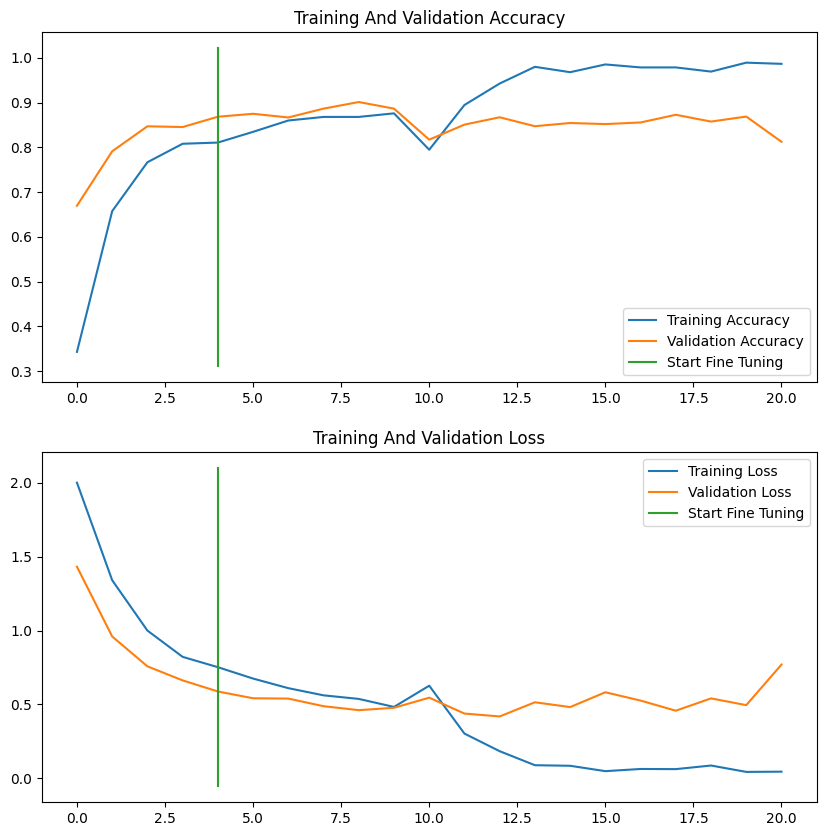

In [48]:
compare_history(history_0, model_2)

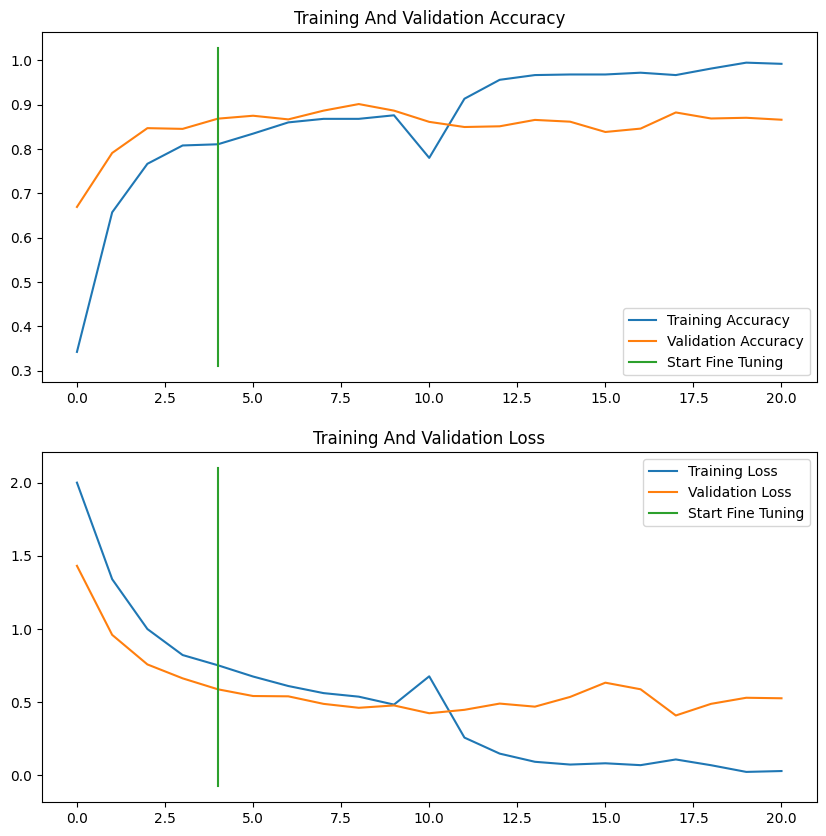

In [49]:
compare_history(history_0, model_3)

so the model is basically overfitting